In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers, initializers, activations
from tensorflow.keras.applications import resnet, resnet50
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
patient2 = pd.read_csv("patient2.csv")
train2a = patient2.iloc[1801:]
train2a

,y_stim,y_values,Fz,Cz,Pz,Oz,P3,P4,PO7,PO8
1801,1,1,0.2240,-1.0630,-2.8979,-6.2284,-6.1408,-5.7846,-8.3081,-12.3270
1802,1,1,-1.4557,-3.9854,-5.9924,-9.8773,-8.3371,-10.7040,-9.8820,-19.2700
1803,1,1,-4.1644,-7.3057,-9.4862,-13.2900,-10.0050,-14.7670,-11.2650,-23.1250
1804,1,1,-8.0071,-11.1900,-13.6160,-16.8620,-12.1020,-18.1270,-13.1290,-24.3680
1805,1,1,-12.2780,-15.1050,-17.8870,-20.2990,-14.6770,-20.7690,-15.3500,-23.8880
...,...,...,...,...,...,...,...,...,...,...
347699,0,0,-3.3628,-5.1473,-11.2820,-9.9149,-10.4250,-16.0170,-27.0720,17.5380
347700,0,0,-2.7750,-5.1409,-10.9560,-8.6329,-8.9733,-16.0310,-24.1710,14.8680
347701,0,0,-2.4850,-4.5662,-9.9037,-7.6332,-7.5994,-14.1460,-19.7530,10.1660
347702,0,0,-3.0849,-3.8300,-8.5856,-7.5911,-6.7784,-10.7370,-14.6870,3.0836


In [3]:
target_stim_0 = train2a[train2a['y_values'] == 0]
print("Number of Target_Stimulus_0 Detected: {}".format(len(target_stim_0)))

target_stim_1 = train2a[train2a['y_values'] == 1]
print("Number of Target_Stimulus_1 Detected: {}".format(len(target_stim_1)))

target_stim_2 = train2a[train2a['y_values'] == 2]
print("Number of Target_Stimulus_2 Detected: {}".format(len(target_stim_2)))

Number of Target_Stimulus_0 Detected: 211504
Number of Target_Stimulus_1 Detected: 111999
Number of Target_Stimulus_2 Detected: 22400


In [6]:
target1_set = train2a[train2a['y_values'] == 1]
target1_set.describe()

,y_stim,y_values,Fz,Cz,Pz,Oz,P3,P4,PO7,PO8
count,111999.000000,111999.0,111999.000000,111999.000000,111999.000000,111999.000000,111999.000000,111999.000000,111999.000000,111999.000000
mean,6.642908,1.0,-0.243513,-0.177680,0.041875,0.253967,-0.025508,0.067014,0.039518,0.146703
std,3.435251,0.0,9.803507,9.855396,8.530915,9.656385,8.304902,7.901916,9.595970,10.591578
min,1.000000,1.0,-56.248000,-169.150000,-86.569000,-57.524000,-62.325000,-58.043000,-60.432000,-63.127000
25%,4.000000,1.0,-5.689600,-5.561950,-5.110350,-5.846100,-5.264200,-4.895200,-6.128850,-6.318950
50%,7.000000,1.0,-0.629330,-0.284280,-0.070161,-0.088933,-0.189830,-0.107850,-0.150640,0.175030
75%,10.000000,1.0,4.405800,5.088350,5.060300,5.821900,4.963450,4.822850,5.888400,6.646750
max,12.000000,1.0,348.170000,344.460000,345.770000,332.950000,341.550000,347.650000,338.200000,330.090000


In [7]:
target2_set = train2a[train2a['y_values'] == 2]
target2_set.describe()

,y_stim,y_values,Fz,Cz,Pz,Oz,P3,P4,PO7,PO8
count,22400.000000,22400.0,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,5.785714,2.0,-1.101031,-0.577448,0.189537,0.567560,-0.004530,0.263359,0.484724,0.675502
std,3.447199,0.0,8.792796,8.815400,8.343559,9.259724,7.938766,7.493316,9.209716,10.139831
min,1.000000,2.0,-35.029000,-48.852000,-50.508000,-36.497000,-35.060000,-28.011000,-34.501000,-44.287000
25%,3.000000,2.0,-6.461925,-5.979800,-4.975075,-5.444200,-5.286025,-4.718575,-5.703000,-5.634250
50%,6.500000,2.0,-1.413400,-0.821695,0.076152,0.176980,-0.177915,0.067569,0.347800,0.818625
75%,9.000000,2.0,3.591300,4.746850,5.314000,6.232825,5.126200,4.971025,6.391075,7.044375
max,12.000000,2.0,65.010000,72.520000,47.674000,48.775000,32.629000,30.720000,41.814000,44.874000


In [8]:
num_classes = np.unique(train2a['y_stim'])
print(num_classes)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [10]:
train2a['y_stim'].value_counts()

0     211504
12     11200
11     11200
10     11200
9      11200
8      11200
7      11200
6      11200
5      11200
4      11200
3      11200
2      11200
1      11199
Name: y_stim, dtype: int64

<BarContainer object of 13 artists>

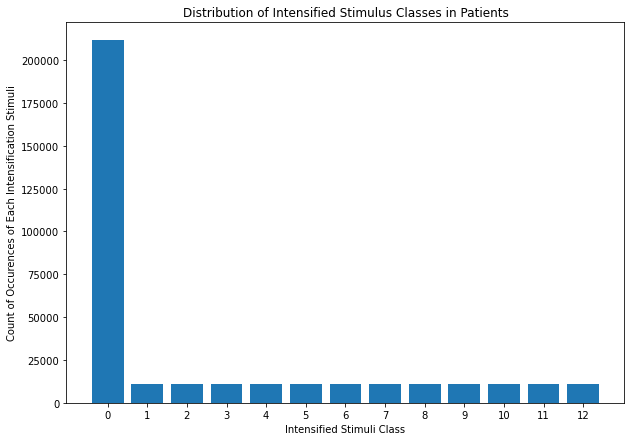

In [12]:
count = [211504, 11199, 11200, 11200, 11200, 11200, 11200, 11200, 11200, 11200, 11200, 11200, 11200]
y_stim_vals = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]

plt.figure(figsize = (10, 7))
plt.title("Distribution of Intensified Stimulus Classes in Patients")
plt.xlabel("Intensified Stimuli Class")
plt.ylabel("Count of Occurences of Each Intensification Stimuli")
plt.bar(y_stim_vals, count)